In [9]:
# Data from https://www.dropbox.com/s/fsxepdka4l2pr45/prachathai-67k.zip

In [10]:
import pandas as pd


In [11]:
prachathai = pd.read_csv('prachathai-67k\prachathai-67k.csv')
print(prachathai.shape)
prachathai.head()

(67889, 5)


,url,date,title,body_text,labels
0,https://prachatai.com/print/42,2004-08-24 14:31,"นักวิจัยหนุน ""แม้ว"" เปิด ""จีเอ็มโอ""",ประชาไท --- 23 ส.ค.2547 นักวิจัยฯ ชี้นโยบายจี...,"['ข่าว', 'สิ่งแวดล้อม']"
1,https://prachatai.com/print/41,2004-08-24 14:22,ภาคประชาชนต้านเปิดเสรีจีเอ็มโอ,ประชาไท- 23 ส.ค.2547 นักวิชาการ ภาคประชาชน จ...,"['ข่าว', 'สิ่งแวดล้อม']"
2,https://prachatai.com/print/43,2004-08-24 15:17,จุฬาฯ ห่วงจีเอ็มโอลามข้าวไทย,นโยบายที่อนุญาตให้ปลูกร่วมกับพืชอื่นได้นั้นถื...,"['ข่าว', 'สิ่งแวดล้อม']"
3,https://prachatai.com/print/45,2004-08-24 15:58,ฟองสบู่การเมืองแตก ทักษิณหมดกึ๋น ชนชั้นกลางหมด...,ประชาไท -- 23 ส.ค. 47 ขาประจำทักษิณ ฟันธง ฟอง...,"['ข่าว', 'การเมือง', 'คณะเศรษฐศาสตร์ มหาวิทยาล..."
4,https://prachatai.com/print/47,2004-08-24 16:10,กอต.เสนอเลิกถนนคลองลาน-อุ้มผาง,ประชาไท-23 ส.ค.47 คณะกรรมการอนุรักษ์ ผืนป่าตะ...,"['ข่าว', 'สิ่งแวดล้อม']"


In [12]:
from pythainlp.tokenize import word_tokenize


ตัดคำ

In [13]:
sentences = [word_tokenize(text,engine='newmm') for text in prachathai['body_text'].tolist()]

In [14]:
try:
    dict = {'sentences':sentences}  
    df = pd.DataFrame(dict) 
    # saving the dataframe 
    df.to_csv('sentences.csv') 
except:
    pass

In [15]:
sentences[20]

[' ',
 '"',
 'นคร',
 ' ',
 'ชม',
 'ภู',
 'ชาติ',
 ' ',
 'จาก',
 'สภา',
 'ทนายความ',
 ' ',
 'ใน',
 'ฐานะ',
 'ทนายความ',
 'ของ',
 'น.ส.',
 'สุ',
 'ภิญญา',
 '  ',
 'กลาง',
 'ณรงค์',
 '"',
 '    ',
 '\n',
 'คดี',
 'ที่',
 'ฟ้อง',
 'ทาง',
 'แพ่ง',
 'ครั้งนี้',
 'มี',
 'เนื้อ',
 'ความเหมือน',
 'คดีอาญา',
 'ที่',
 'เคย',
 'ถูก',
 'ฟ้อง',
 'มา',
 'แล้ว',
 'ก่อนหน้านี้',
 'แต่',
 'เป็นการ',
 'เรียกค่าเสียหาย',
 'เพิ่มเติม',
 'โดย',
 'โจทก์',
 'ระบุ',
 'สาเหตุ',
 'ของ',
 'ความเสียหาย',
 'ว่า',
 'มาจาก',
 ' ',
 '4',
 ' ',
 'ข้อ',
 ' ',
 'ข้อ',
 'ละ',
 ' ',
 '100',
 ' ',
 'ล้าน',
 'บาท',
 ' ',
 'คือ',
 '    ',
 '\n',
 '1.',
 'ทำให้',
 'โจทก์',
 'ซึ่ง',
 'ประกอบ',
 'กิจการ',
 'โดยเฉพาะ',
 'โทรคมนาคม',
 'ที่',
 'มีชื่อเสียง',
 'มาโดยตลอด',
 'ต้อง',
 'ได้รับ',
 'ความเสียหาย',
 ' ',
 'เสียชื่อเสียง',
 ' ',
 'เกียรติคุณ',
 '     ',
 '\n',
 '2.',
 'จำเลย',
 'ทำให้',
 'โจทก์',
 'เสียหาย',
 'ใน',
 'ทาง',
 'ทำ',
 'กิน',
 ' ',
 'รวมทั้ง',
 'ทาง',
 'เจริญเติบโต',
 'ของ',
 'ธุรกิจ',
 ' ',
 'ที่',
 'คาด',
 'ว่

เตรียม word2Vec

In [16]:
from gensim.models import word2vec
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [17]:
print(sentences[0:2])

[['ประชา', 'ไท', ' ', '---', ' ', '23', ' ', 'ส.ค.', '2547', '  ', 'นักวิจัย', 'ฯ', ' ', 'ชี้', 'นโยบาย', 'จีเอ็มโอ', 'เอื้อ', 'ต่อ', 'การค้นคว้าวิจัย', ' ', 'แต่', 'ไม่ใช่', 'คำตอบ', 'ทั้งหมด', ' ', 'ขณะที่', 'ผอ.', 'สวทช.', 'ระบุ', 'มาตรการ', 'ตรวจสอบ', 'ความปลอดภัย', 'มี', 'มา', 'ก่อน', 'การ', 'กำหนด', 'นโยบาย', 'ของ', 'รัฐบาล', ' ', 'เพียงแต่', 'ทบทวน', 'และ', 'ปรับปรุง', 'เพิ่มเติม', '  ', '\n', 'สำนักงาน', 'พัฒนา', 'วิทยาศาสตร์', 'และ', 'เทคโนโลยี', '  ', 'จัด', 'สัมมนา', 'เกี่ยวกับ', 'มะละกอ', 'ดัดแปลง', 'พันธุกรรม', 'ใน', 'ประเทศไทย', ' ', 'มี', 'นักวิชาการ', ' ', 'นักวิจัย', 'จาก', 'กรมวิชาการเกษตร', '  ', 'มหาวิทยาลัยเกษตรศาสตร์', '  ', 'และ', 'มหาวิทยาลัยมหิดล', 'เข้าร่วม', '  ', 'โดย', 'มี', 'การ', 'นำเสนอ', 'ผลการศึกษา', 'ทดลอง', 'ที่ผ่านมา', '  ', 'ซึ่ง', 'พบ', 'ว่า', 'มะละกอ', '\n', 'จีเอ็มโอ', 'ผ่านการทดสอบ', 'ความปลอดภัย', 'ทาง', 'ชีวภาพ', 'สิ่งแวดล้อม', 'และ', 'อาหาร', 'ระดับ', 'หนึ่ง', 'เท่านั้น', '    ', '\n', ' ', '"', 'การค้นคว้าวิจัย', 'มะละกอ', 'จีเอ็มโอ', 'รวมถ

In [18]:
num_workers = 4 # number of threads (run in parallel)
downsampling = 1e-3 # the threashold for configurin which higher-frequency words are randomly downsampled (useful range(0,1e-5))
num_feature = 100 # Dimensionalit of the word vectors
min_word_count = 10 # Ignore all words with total frequency lower than this
context = 8 # Maxximum distance between the current and predicted word within a sentence.
modelname = 'word2vec_gensim'

In [19]:
w2v = word2vec.Word2Vec(workers=num_workers, max_vocab_size=None, vector_size=num_feature,
                        min_count=min_word_count, window=context, sample=downsampling)


In [20]:
w2v.build_vocab(sentences)

Train

In [21]:
model = w2v.train(sentences,total_examples=w2v.corpus_count,epochs=10)


In [22]:
try:
    model.save("word2vec.model")
except:
    pass

Test Example

In [23]:
WORD = 'รถ'
w2v.wv.most_similar(WORD, topn=20)


[('รถกระบะ', 0.8391493558883667),
 ('รถสิบล้อ', 0.8235973715782166),
 ('รถตู้', 0.8207762241363525),
 ('รถยนต์', 0.7953808903694153),
 ('รถบรรทุก', 0.7825443148612976),
 ('จักรยานยนต์', 0.7764179110527039),
 ('รถบัส', 0.7736678123474121),
 ('รถมอเตอร์ไซค์', 0.7729867100715637),
 ('กระบะ', 0.7675960063934326),
 ('รถทัวร์', 0.7675246000289917),
 ('รถจักรยาน', 0.7637677788734436),
 ('รถจักรยานยนต์', 0.7602120041847229),
 ('ลิฟท์', 0.7505696415901184),
 ('รถเก๋ง', 0.7494451403617859),
 ('ขบวนรถ', 0.7451897263526917),
 ('มอเตอร์ไซค์', 0.742558479309082),
 ('รถพ่วง', 0.7405983805656433),
 ('รถหกล้อ', 0.7379193902015686),
 ('คนขับรถ', 0.735040545463562),
 ('ขับรถ', 0.7341622114181519)]

In [24]:
WORD = 'เมื่อไหร่'
w2v.wv.most_similar(WORD, topn=20)

[('เมื่อไร', 0.9347016215324402),
 ('เมื่อใด', 0.7305006980895996),
 ('หรือยัง', 0.7018803358078003),
 ('ยังไง', 0.6603926420211792),
 ('ที่ไหน', 0.6484417915344238),
 ('วันใด', 0.6381266117095947),
 ('อีกหน่อย', 0.6245430707931519),
 ('ไหม', 0.6200838685035706),
 ('วันหนึ่ง', 0.6085060834884644),
 ('อยู่ดีๆ', 0.598455011844635),
 ('เดี๋ยว', 0.5977216362953186),
 ('หรือเปล่า', 0.5949921607971191),
 ('ไง', 0.5886408686637878),
 ('สักที', 0.5861262083053589),
 ('เชื่อเถอะ', 0.5703983902931213),
 ('จู่ๆ', 0.5653114914894104),
 ('มั้ย', 0.5641443133354187),
 ('เพราะอะไร', 0.5592016577720642),
 ('ตรงไหน', 0.5563405156135559),
 ('ทันที', 0.552716851234436)]

In [25]:
WORD = 'แม้ว'
w2v.wv.most_similar(WORD, topn=20)

[('แอ้ด', 0.743043839931488),
 ('"กษิต"', 0.7271677851676941),
 ('ลั่น', 0.7086421251296997),
 ('แฉ', 0.7084677219390869),
 ('มท.1', 0.7036770582199097),
 ('ปูด', 0.6982495784759521),
 ('มาร์ค', 0.6974632143974304),
 ('จวก', 0.6910861730575562),
 ('รบ.', 0.6790048480033875),
 ('บิ๊ก', 0.6771410703659058),
 ('เหลิม', 0.6691214442253113),
 ('เมิน', 0.6576798558235168),
 ('คนโกง', 0.6471376419067383),
 ('เย้ย', 0.6457255482673645),
 ('เพียบ', 0.6453643441200256),
 ("\xa0'", 0.6425312757492065),
 ('ปชป.', 0.6421924233436584),
 ("'\xa0", 0.6412088871002197),
 ('ตู่', 0.640868604183197),
 ('ทรท.', 0.6396011114120483)]

In [26]:
WORD = 'ทักษิณ'
w2v.wv.most_similar(WORD, topn=20)

[('อภิสิทธิ์', 0.6385932564735413),
 ('ษิน', 0.6307551860809326),
 ('อำมาตย์', 0.5888842940330505),
 ('อำมาตยาธิปไตย', 0.582269012928009),
 ('ชินวัตร', 0.5774354934692383),
 ('ประชาธิปัตย์', 0.5744065046310425),
 ('บรรหาร', 0.5657556056976318),
 ('เนวิน', 0.5640488266944885),
 ('ลิ่วล้อ', 0.5604701638221741),
 ('หุ่นเชิด', 0.544934868812561),
 ('เผด็จการ', 0.5436272621154785),
 ('รัฐประหาร', 0.5364387631416321),
 ('นอมินี', 0.5283088088035583),
 ('ขายชาติ', 0.5238112211227417),
 ('ทรราช', 0.5102506279945374),
 ('อมาตยาธิปไตย', 0.5099377632141113),
 ('สนธิ', 0.5099274516105652),
 ('พลเอกเปรม ติณสูลานนท์', 0.5088088512420654),
 ('นายใหญ่', 0.5068730115890503),
 ('เหลิงอำนาจ', 0.5065018534660339)]

In [27]:
WORD = 'นักข่าว'
wd = w2v.wv.most_similar(WORD, topn=20)
wd

[('ช่างภาพ', 0.7757322788238525),
 ('บล็อกเกอร์', 0.6670809388160706),
 ('ผู้ประกาศข่าว', 0.6480328440666199),
 ('สื่อมวลชน', 0.6318206787109375),
 ('บีบีซี', 0.6244786977767944),
 ('ผู้สื่อข่าว', 0.6192168593406677),
 ('เดอะเนชั่น', 0.6084224581718445),
 ('คอลัมนิสต์', 0.6048362255096436),
 ('ตากล้อง', 0.5931663513183594),
 ('สื่อ', 0.5885286331176758),
 ('ข่าว', 0.5852381587028503),
 ('เทเลกราฟ', 0.5806021094322205),
 ('ข่าวกีฬา', 0.573738694190979),
 ('ผู้รายงานข่าว', 0.564088761806488),
 ('ThaiPBS', 0.5514214038848877),
 ('โปรดิวเซอร์', 0.5494003295898438),
 ('CNN', 0.547064483165741),
 ('TPBS', 0.544996440410614),
 ('SCMP', 0.5403591990470886),
 ('บรรณาธิการ', 0.5399929285049438)]

In [28]:
x = [w[0] for w in wd]
x.append(WORD)

In [29]:
# labels = w2v.wv.index2word
labels = w2v.wv.index_to_key

plot graph

In [30]:
from sklearn.manifold import TSNE # นำมาลด dimension จาก 100 มาเป็น 2 
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)
thai2plot = tsne.fit_transform(w2v.wv.vectors)


In [31]:
sample_idx = []
for word in x:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]

In [40]:
def plot_with_labels(low_dim_embs, labels, filename, figsize=(10, 10)):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=figsize)
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        prop = font_manager.FontProperties(fname=f'THSarabunNew.ttf', size=20)
        plt.annotate(label, fontproperties=prop,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right', va='bottom')
    plt.savefig(filename)


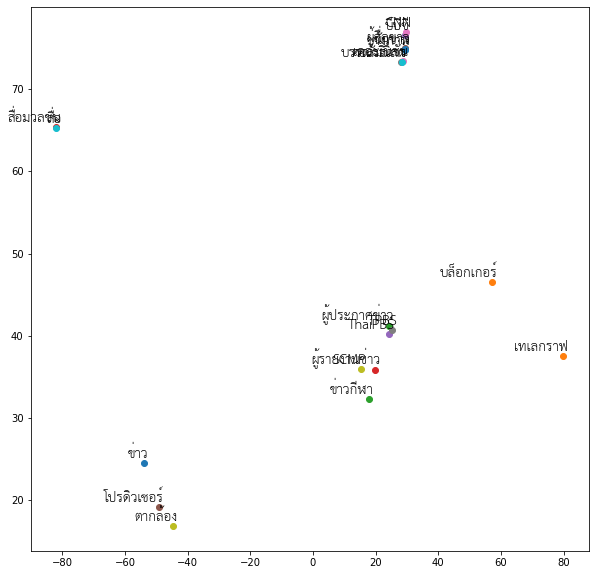

In [41]:
plot_with_labels(sample_plot,x,'sample.png')